In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [5]:
#read data from csv file

df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
print(df.shape[0],df.shape[1])

284807 31


In [8]:
#to find the columns

df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [9]:
df.isnull().sum().max()

0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [11]:
#to know the distrubution of fraud and normal transactions

print('Normal Transactions count:',data['Class'].value_counts().values[0])
print('Fraudulent Transactions count:',data['Class'].value_counts().values[1])

Normal Transactions count: 284315
Fraudulent Transactions count: 492


In [12]:
#to know the percentade of fraud and normal transactions

print('Normal transactions are',(data['Class'].value_counts().values[0]/data.shape[0])*100,'% of the dataset')
print('Fraudulent transactions are',(data['Class'].value_counts().values[1]/data.shape[0])*100,'% of the dataset')

Normal transactions are 99.82725143693798 % of the dataset
Fraudulent transactions are 0.1727485630620034 % of the dataset


Text(0, 0.5, 'Frequency')

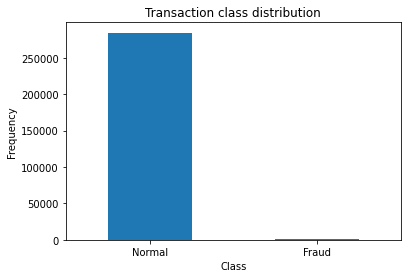

In [13]:
#EXPLORATORY ANALYSIS
#To know the transaction class distrubution

count_class=pd.value_counts(data['Class'],sort=True)
count_class.plot(kind='bar',rot=0)
plt.title('Transaction class distribution')
LABELS=['Normal','Fraud']
plt.xticks(range(2),LABELS)
plt.xlabel('Class')
plt.ylabel('Frequency')

(0.0, 172792.0)

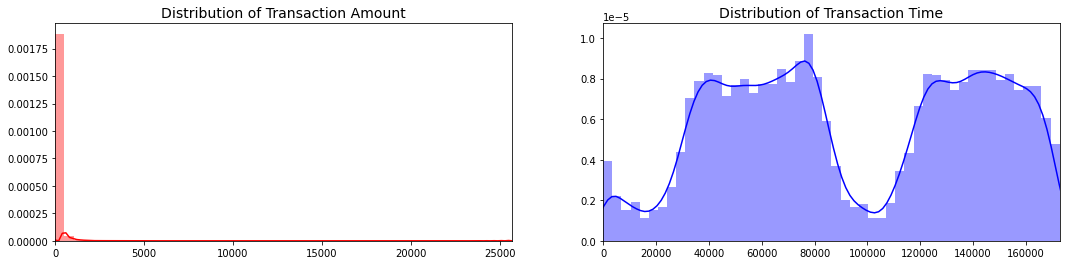

In [14]:
#Visualization of time and amount distrubution

fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = data['Amount'].values
time_val = data['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])


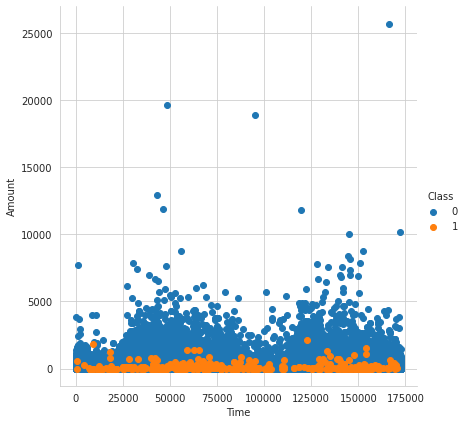

In [15]:
#Visualization of time and amount using class
sns.set_style("whitegrid")
sns.FacetGrid(data, hue="Class", size = 6).map(plt.scatter, "Time", "Amount").add_legend()
plt.show()

By the above graph there are frauds only on the transactions which have transaction amount approximately less than 2500 and the transactions which have transaction amount approximately above 2500 have no fraud

In [16]:
#Know about the fraud and normal amount

fraud=data[data['Class']==1]
normal=data[data['Class']==0]
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [17]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [18]:
#NORMALIZATIO OF DATA
#Normalization of data is done upto particular range
#RobustScaler reduces the influence of outliers

from sklearn.preprocessing import StandardScaler,RobustScaler

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

data['scaled_amount'] = std_scaler.fit_transform(data['Amount'].values.reshape(-1,1))
data['scaled_time'] = rob_scaler.fit_transform(data['Time'].values.reshape(-1,1))

data.drop(['Time','Amount'], axis=1, inplace=True)

In [19]:
scaled_amount = data['scaled_amount']
scaled_time = data['scaled_time']

data.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
data.insert(0, 'scaled_amount', scaled_amount)
data.insert(1, 'scaled_time', scaled_time)

In [20]:
#Creation of sub sample of data which has equal amount of fraud and non fraud cases to avoid over fitting

data = data.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = data.loc[data['Class'] == 1]
non_fraud_df = data.loc[data['Class'] == 0][:492]
normal_distributed_df = pd.concat([fraud_df, non_fraud_df])
# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)
new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
277778,-0.349231,0.976950,2.086211,0.069609,-1.350529,0.324304,0.120085,-1.263190,0.319880,-0.451761,0.461480,-0.012321,-0.662933,0.760090,1.052103,0.287490,0.645802,-0.218794,-0.611455,-0.134892,-0.182441,-0.180663,0.246076,0.927684,-0.029365,-0.046741,0.320658,-0.104650,-0.013395,-0.058172,0
11841,-0.349231,-0.756118,-15.271362,8.326581,-22.338591,11.885313,-8.721334,-2.324307,-16.196419,0.512882,-6.333685,-13.175198,9.939820,-14.225456,0.716034,-14.004776,-0.329448,-8.059419,-12.122009,-4.799710,0.686227,0.993121,-2.356896,1.068019,1.085617,-1.039797,-0.182006,0.649921,2.149247,-1.406811,1
128066,0.334441,-0.071723,0.924646,-0.854503,0.837801,0.734950,-1.301756,-0.223249,-0.516070,-0.005195,-0.826724,0.718722,-0.152582,0.083546,0.385474,0.041068,1.313520,-1.414727,0.042482,1.014012,-1.919974,-0.235716,-0.096106,-0.103987,-0.059956,0.377011,0.212868,-0.307670,0.055587,0.066163,0
102443,-0.349231,-0.193670,-13.192671,12.785971,-9.906650,3.320337,-4.801176,5.760059,-18.750889,-37.353443,-0.391540,-5.052502,4.406806,-4.610756,-1.909488,-9.072711,-0.226074,-6.211557,-6.248145,-3.149247,0.051576,-3.493050,27.202839,-8.887017,5.303607,-0.639435,0.263203,-0.108877,1.269566,0.939407,1
30398,-0.316727,-0.573151,-3.519030,4.140867,-3.628202,5.505672,-4.057463,-0.905945,-6.652031,2.634524,-4.679402,-6.546242,3.538202,-8.042285,1.697509,-8.051049,1.070457,-7.395957,-14.329626,-4.868010,2.463843,0.898723,1.582556,0.778710,-0.135707,-0.004278,0.032706,0.362014,0.900925,0.554897,1


Text(0.5, 0, 'Class')

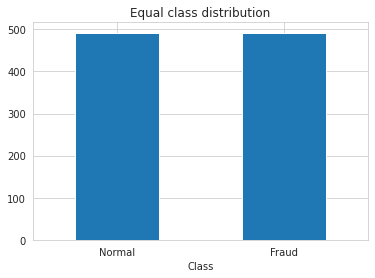

In [21]:
#After creation of subsample visualization of transaction class distrubution

count_class=pd.value_counts(new_df['Class'],sort=True)
count_class.plot(kind='bar',rot=0)
plt.title('Equal class distribution')
LABELS=['Normal','Fraud']
plt.xticks(range(2),LABELS)
plt.xlabel('Class')

Text(0.5, 1.0, 'Heatmap of Correlation')

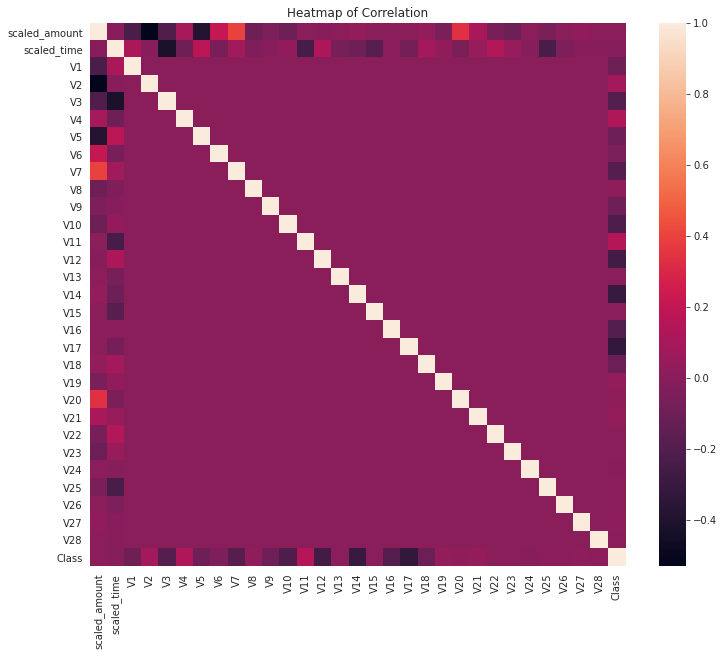

In [22]:
#Visualization of correleation using heatmap

plt.figure(figsize=(12,10))
heat=sns.heatmap(data.corr())
plt.title('Heatmap of Correlation')

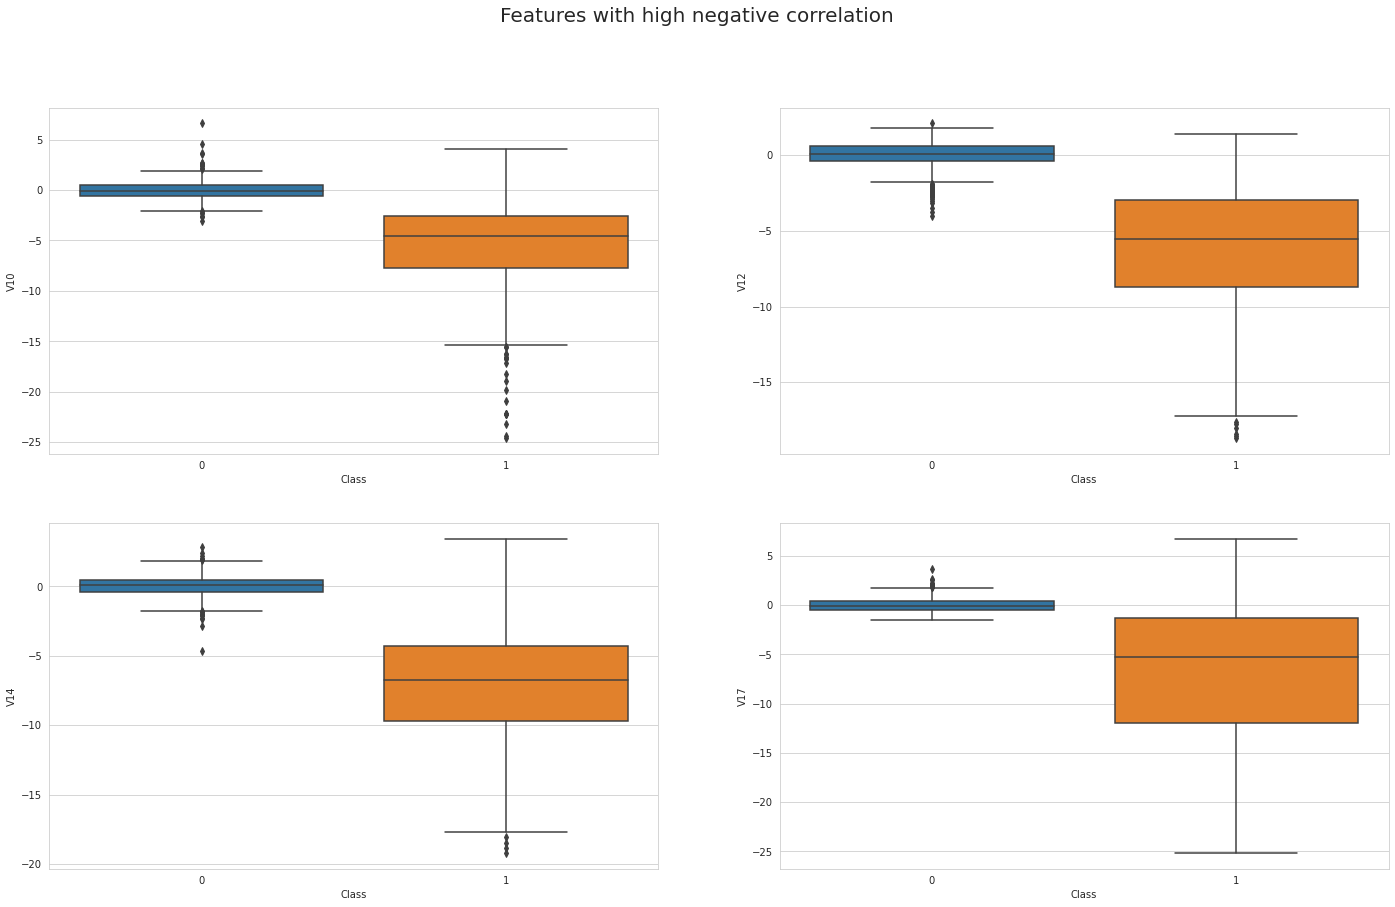

In [23]:
#Visualization of corelaetion by boxplot

f,ax=plt.subplots(2,2,figsize=(24,14))
f.suptitle('Features with high negative correlation',size=20)
sns.boxplot(x='Class',y='V10',data=new_df,ax=ax[0,0])
sns.boxplot(x='Class',y='V12',data=new_df,ax=ax[0,1])
sns.boxplot(x='Class',y='V14',data=new_df,ax=ax[1,0])
sns.boxplot(x='Class',y='V17',data=new_df,ax=ax[1,1])

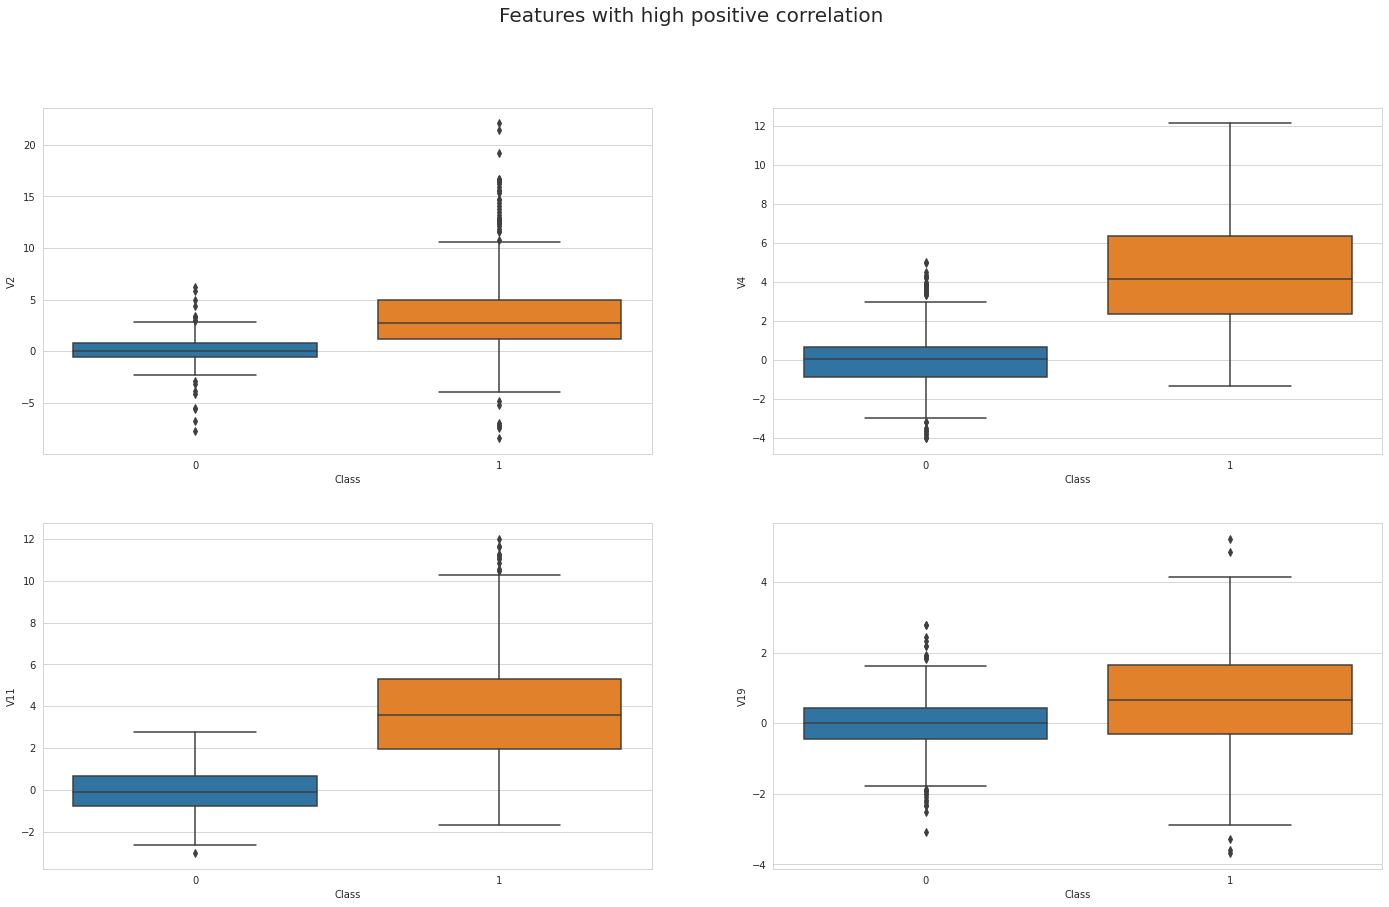

In [24]:
f,ax=plt.subplots(2,2,figsize=(24,14))
f.suptitle('Features with high positive correlation',size=20)
sns.boxplot(x='Class',y='V2',data=new_df,ax=ax[0,0])
sns.boxplot(x='Class',y='V4',data=new_df,ax=ax[0,1])
sns.boxplot(x='Class',y='V11',data=new_df,ax=ax[1,0])
sns.boxplot(x='Class',y='V19',data=new_df,ax=ax[1,1])

In [25]:
#Remove the extreme outliers that has high coreleation 

v14_fraud = new_df['V14'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
v14_iqr = q75 - q25
v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
new_df = new_df.drop(new_df[(new_df['V14'] > v14_upper) | (new_df['V14'] < v14_lower)].index)


v12_fraud = new_df['V12'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
v12_iqr = q75 - q25

v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
new_df = new_df.drop(new_df[(new_df['V12'] > v12_upper) | (new_df['V12'] < v12_lower)].index)



v10_fraud = new_df['V10'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25

v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off

new_df = new_df.drop(new_df[(new_df['V10'] > v10_upper) | (new_df['V10'] < v10_lower)].index)

Classifier : An algorithm that maps input data to the specify category.

In [26]:
X=new_df.drop('Class',axis=1) 
y=new_df['Class']

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [28]:
#import required classifiers

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [29]:
#Logistic Regression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
#Support Vector Classifier
svc=SVC()
svc.fit(X_train,y_train)
#K-nearest neighbors
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
#Random Forest Classifier
RDF_Classifier=RandomForestClassifier(random_state=0)
RDF_Classifier.fit(X_train,y_train)
#DecisionTreeClassifier
DecisionTreeClassifier= DecisionTreeClassifier()
DecisionTreeClassifier.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [31]:
#model evaluation and prediction

from sklearn.model_selection import cross_val_score
models_list=[('Logistic Regression',logmodel),('SVC',svc),('KNeighborsClassifier',knn),('RFC',RDF_Classifier),('DecisionTreeClassifier',DecisionTreeClassifier)]
models=[j for j in models_list]
print()
#print('===========================Model Evaluation Results================================')
for i,v in models:
      print('==========================={}=========================================='.format(i))
      a=cross_val_score(v, X_train, y_train, cv=5)
      print('Cross validation score=',a.mean())


===========================Logistic Regression==========================================
Cross validation score= 0.9313959567793656
===========================SVC==========================================
Cross validation score= 0.9274573021958871
===========================KNeighborsClassifier==========================================
Cross validation score= 0.9261240850470547
===========================RFC==========================================
Cross validation score= 0.9274311606831649
===========================DecisionTreeClassifier==========================================
Cross validation score= 0.8904583478563961


In [39]:
#Test models

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
models_list=[('Logistic Regression',logmodel),('SVC',svc),('KNeighborsClassifier',knn),('RFC',RDF_Classifier),('DecisionTreeClassifier',DecisionTreeClassifier)]
models=[j for j in models_list]
print()
print('===========Model Test Results===========')
for i,v in models:
      print('======================{}========================'.format(i))
      pred_test = v.predict(X_test)
      print('Accuracy =',accuracy_score(y_test,pred_test))
      print('Confusion Matrix')
      print(confusion_matrix(y_test,pred_test))
      print('')
      print('Classification Report')
      print(classification_report(y_test,pred_test))


===========Model Test Results===========
======================Logistic Regression========================
Accuracy = 0.9578947368421052
Confusion Matrix
[[88  3]
 [ 5 94]]

Classification Report
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        91
           1       0.97      0.95      0.96        99

    accuracy                           0.96       190
   macro avg       0.96      0.96      0.96       190
weighted avg       0.96      0.96      0.96       190

======================SVC========================
Accuracy = 0.9526315789473684
Confusion Matrix
[[89  2]
 [ 7 92]]

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.98      0.95        91
           1       0.98      0.93      0.95        99

    accuracy                           0.95       190
   macro avg       0.95      0.95      0.95       190
weighted avg       0.95      0.95      0.95       190

==========